In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [82]:
import pandas as pd


csv_file_path = '/content/gdrive/MyDrive/Phishing detection Minor Project /Final datasets/nazario_emails.csv'
df_phishing = pd.read_csv(csv_file_path, encoding='cp1252')

csv_file_path = '/content/gdrive/MyDrive/Phishing detection Minor Project /Final datasets/legal_emails.csv'
df_legal = pd.read_csv(csv_file_path, encoding='cp1252')

In [83]:
# Adding an extra column to df_legal with value 0
df_legal['Label'] = 0

# Adding an extra column to df_phishing with value 1
df_phishing['Label'] = 1

# Concatenating the datasets and shuffling rows randomly (if needed)
df_combined = pd.concat([df_legal, df_phishing]).sample(frac=1).reset_index(drop=True)

df=df_combined

df = df.drop('From', axis=1)
df = df.drop('ï»¿From', axis=1)
#df = df.drop('URL', axis=1)
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('To', axis=1)
column_names = df.columns.tolist()
df.head()

,Subject,URL,Body,Label
0,North Fork Bank client service team: client de...,http://nfbconnect-00957.northforkbank.com.modd...,\r\r\r\r\rDear North Fork Bank cust...,1
1,Software Erequests for Credit Modeling,NaN,\tvince.kaminski@enron.com\r\rMime-Version: 1....,0
2,Regions Bank: Confirmation Required!,http://interactsession-800889731.regions.com.m...,\r\r\r\r\rDear business client of Re...,1
3,Security Measures,"http://www.lakevieweast.com/image/art-logo1.gif""",\r \r \r \r\r Dear MidAmerica Ban...,1
4,Re: Term EOL deal,NaN,Sorry - it was last Thursday 3/9\r\r\r\rSheri\...,0


In [84]:
import pandas as pd
import string
import re

# Assuming you already have a DataFrame called df

# Handle missing values in 'Body' and 'Subject' columns
df['Body'].fillna('', inplace=True)
df['Subject'].fillna('', inplace=True)

# Calculate the total length of the 'Body' column
df['Total_Length_Body'] = df['Body'].apply(lambda x: len(x))

# Calculate the total length of the 'Subject' column
df['Total_Length_Subject'] = df['Subject'].apply(lambda x: len(x))

# Calculate the number of special characters in the 'Body' column
df['Special_Characters_Body'] = df['Body'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Calculate the number of special characters in the 'Subject' column
df['Special_Characters_Subject'] = df['Subject'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Calculate the number of newline characters in the 'Body' column
df['Newline_Count_Body'] = df['Body'].apply(lambda x: x.count('\r'))

# Calculate the number of newline characters in the 'Subject' column
df['Newline_Count_Subject'] = df['Subject'].apply(lambda x: x.count('\r'))

# Calculate the number of punctuation characters in the 'Body' column
df['Punctuation_Count_Body'] = df['Body'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Calculate the number of punctuation characters in the 'Subject' column
df['Punctuation_Count_Subject'] = df['Subject'].apply(lambda x: sum(1 for char in x if char in string.punctuation))

# Calculate the number of digits in the 'Body' column
df['Digit_Count_Body'] = df['Body'].apply(lambda x: sum(1 for char in x if char.isdigit()))

# Calculate the number of digits in the 'Subject' column
df['Digit_Count_Subject'] = df['Subject'].apply(lambda x: sum(1 for char in x if char.isdigit()))

# Calculate the number of uppercase letters in the 'Body' column
df['Uppercase_Count_Body'] = df['Body'].apply(lambda x: sum(1 for char in x if char.isupper()))

# Calculate the number of uppercase letters in the 'Subject' column
df['Uppercase_Count_Subject'] = df['Subject'].apply(lambda x: sum(1 for char in x if char.isupper()))

# Calculate the number of words in the 'Body' column
df['Word_Count_Body'] = df['Body'].apply(lambda x: len(x.split()))

# Calculate the number of words in the 'Subject' column
df['Word_Count_Subject'] = df['Subject'].apply(lambda x: len(x.split()))

# Calculate the average word length in the 'Body' column
df['Avg_Word_Length_Body'] = df['Body'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Calculate the average word length in the 'Subject' column
df['Avg_Word_Length_Subject'] = df['Subject'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Calculate the number of exclamation marks in the 'Body' column
df['Exclamation_Count_Body'] = df['Body'].apply(lambda x: x.count('!'))

# Calculate the number of exclamation marks in the 'Subject' column
df['Exclamation_Count_Subject'] = df['Subject'].apply(lambda x: x.count('!'))

# Calculate the number of question marks in the 'Body' column
df['Question_Count_Body'] = df['Body'].apply(lambda x: x.count('?'))

# Calculate the number of question marks in the 'Subject' column
df['Question_Count_Subject'] = df['Subject'].apply(lambda x: x.count('?'))

# Define a function to count sentences
def count_sentences(text):
    sentences = re.split(r'[.!?]', text)
    return len(sentences)

# Calculate the number of sentences in the 'Body' column
df['Sentence_Count_Body'] = df['Body'].apply(count_sentences)

# Calculate the number of sentences in the 'Subject' column
df['Sentence_Count_Subject'] = df['Subject'].apply(count_sentences)

# Define a function to calculate average sentence length
def avg_sentence_length(text):
    sentences = re.split(r'[.!?]', text)
    sentence_lengths = [len(sentence) for sentence in sentences if len(sentence) > 0]
    return sum(sentence_lengths) / len(sentence_lengths) if len(sentence_lengths) > 0 else 0

# Calculate the average sentence length in the 'Body' column
df['Avg_Sentence_Length_Body'] = df['Body'].apply(avg_sentence_length)

# Calculate the average sentence length in the 'Subject' column
df['Avg_Sentence_Length_Subject'] = df['Subject'].apply(avg_sentence_length)



In [5]:
df.head(10)

,Subject,URL,Body,Label,Total_Length_Body,Total_Length_Subject,Special_Characters_Body,Special_Characters_Subject,Newline_Count_Body,Newline_Count_Subject,...,Avg_Word_Length_Body,Avg_Word_Length_Subject,Exclamation_Count_Body,Exclamation_Count_Subject,Question_Count_Body,Question_Count_Subject,Sentence_Count_Body,Sentence_Count_Subject,Avg_Sentence_Length_Body,Avg_Sentence_Length_Subject
0,NG Prices,NaN,"Margaret, \r\r\r\rPlease find attached Texas a...",0,2115,9,70,0,144,0,...,4.841176,4.000000,0,0,4,0,22,1,104.700000,9.0
1,Re: Joint Probabilities,NaN,Bob -\r\r\r\rThanks for your help on this - it...,0,1027,23,52,1,66,0,...,4.876543,7.000000,0,0,0,0,16,1,63.250000,23.0
2,,NaN,,1,0,0,0,0,0,0,...,0.000000,0.000000,0,0,0,0,1,1,0.000000,0.0
3,IMPORTANT : Security Measures Notification of ...,https://a248.e.akamai.net/7/248/1856/90m/www.w...,\r\r\r\r\r \r \r...,1,2094,68,41,1,68,0,...,4.979079,6.666667,0,0,0,0,23,1,90.086957,68.0
4,Re: EOL Credit Responses 2/2,NaN,Tana:\r\r\r\rDTE Coal Services Inc. should be ...,0,231,28,7,2,20,0,...,4.810811,4.800000,0,0,0,0,6,1,37.666667,28.0
5,Re: seminar on beyond ols,NaN,I have reserved EB30C1 from 3:30 pm - 5:30 pm....,0,1079,25,112,1,98,0,...,5.278481,4.200000,0,0,2,0,11,1,133.625000,25.0
6,Re: First Energy Trading Services Inc.,NaN,They should be open for power.\r\r\r\rLeslie\r...,0,510,38,18,2,40,0,...,5.092105,5.500000,0,0,1,0,6,2,84.166667,37.0
7,Re: EOL Credit Responses 09/18/00,NaN,Tana:\r\r\r\rRiley Natural Gas Company is not ...,0,111,33,4,3,14,0,...,4.882353,5.800000,0,0,0,0,2,1,55.000000,33.0
8,Re: Dash request,NaN,"David,\r\r\r\rThanks. I cc you on my message t...",0,809,16,32,1,68,0,...,4.709924,4.666667,0,0,0,0,8,1,100.250000,16.0
9,Notification of limited account access,"http://www.paypal.com/cgi-bin/webscr?cmd=_home"">",\r\r\r \r \rDear valued PayPalí«ŒÂ member: \r\...,1,2496,38,66,0,89,0,...,5.612994,6.800000,0,0,2,0,26,1,95.038462,38.0


**PRE PROCESS: CONVERT TO LOWER CASE AND REMOVE SPECIAL CHARACTER**

In [85]:
import re

def preprocess_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Remove characters starting with \
        text = re.sub(r'\\[\w\s]+', '', text)

    return text

# Convert non-string values in 'Body' and 'Subject' columns to strings
df['Body'] = df['Body'].astype(str)
df['Subject'] = df['Subject'].astype(str)

# Apply the preprocess_text function to the 'Body' and 'Subject' columns of the DataFrame
df['Body'] = df['Body'].apply(preprocess_text)
df['Subject'] = df['Subject'].apply(preprocess_text)


**READABILITY BASED FEATURES**

In [7]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00


In [86]:

import textstat

# create a DataFrame to store the readability features
df_readability = pd.DataFrame()

# iterate over each email in the dataset
for index, row in df.iterrows():
    # calculate the readability scores using the textstat library
    scores = [
        textstat.flesch_reading_ease(str(row['Subject'])),  # use str() to convert to string
        textstat.smog_index(str(row['Subject'])),
        textstat.flesch_kincaid_grade(str(row['Subject'])),
        textstat.coleman_liau_index(str(row['Subject'])),
        textstat.automated_readability_index(str(row['Subject'])),
        textstat.dale_chall_readability_score(str(row['Subject'])),
        textstat.difficult_words(str(row['Subject'])),
        textstat.linsear_write_formula(str(row['Subject']))
    ]
    # add the scores to the DataFrame
    df_readability = df_readability.append(pd.Series(scores), ignore_index=True)

# rename the columns of the DataFrame
df_readability.columns = [
    'flesch_reading_ease',
    'smog_index',
    'flesch_kincaid_grade',
    'coleman_liau_index',
    'automated_readability_index',
    'dale_chall_readability_score',
    'difficult_words',
    'linsear_write_formula'
]

# add the readability features to the original DataFrame
df = pd.concat([df, df_readability], axis=1)



<ipython-input-86-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-86-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-86-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython-input-86-80d2e366f57b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_readability = df_readability.append(pd.Series(scores), ignore_index=True)
<ipython

In [ ]:
df.head()

**URL BASED FEATURE**

In [87]:
import re

# Create new columns in df dataframe
df['url'] = 0
df['https'] = 0
df['ip_address'] = 0
df['hyphen'] = 0
df['num_subdomains'] = 0

# Define a function to extract features from URLs
def extract_url_features(url):
    # check if URL contains "https" or "http"
    has_https = int(re.search("https:\/\/", url) is not None or re.search("http:\/\/", url) is not None)

    # check if URL contains an IP address
    has_ip_address = int(re.search(r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}', url) is not None)

    # check if URL contains a hyphen
    has_hyphen = int("-" in url)

    # count the number of subdomains in the URL
    num_subdomains = url.count('.')

    # return the features as a dictionary
    return {
        'has_https': has_https,
        'has_ip_address': has_ip_address,
        'has_hyphen': has_hyphen,
        'num_subdomains': num_subdomains
    }

# Iterate through each row in the dataframe
for i, row in df.iterrows():
    # Extract URLs from the 'URL' column of the current row
    urls = re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', str(row['URL']))

    # If URLs are found in the 'URL' column of the current row
    if urls:
        # Set the 'url' column value to 1
        df.loc[i, 'url'] = 1

        # Extract URL features for each URL in the current row
        url_features = [extract_url_features(url) for url in urls]

        # Iterate through each URL feature dictionary
        for feature_dict in url_features:
            # Set corresponding column values to 1 if URL has the feature
            df.loc[i, 'https'] = max(df.loc[i, 'https'], feature_dict['has_https'])
            df.loc[i, 'ip_address'] = max(df.loc[i, 'ip_address'], feature_dict['has_ip_address'])
            df.loc[i, 'hyphen'] = max(df.loc[i, 'hyphen'], feature_dict['has_hyphen'])
            df.loc[i, 'num_subdomains'] = max(df.loc[i, 'num_subdomains'], feature_dict['num_subdomains'])

    # If no URLs are found in the 'URL' column of the current row
    else:
        # Set all column values to 0
        df.loc[i, 'url'] = 0
        df.loc[i, 'https'] = 0
        df.loc[i, 'ip_address'] = 0
        df.loc[i, 'hyphen'] = 0
        df.loc[i, 'num_subdomains'] = 0


In [10]:
df.head()

,Subject,URL,Body,Label,Total_Length_Body,Total_Length_Subject,Special_Characters_Body,Special_Characters_Subject,Newline_Count_Body,Newline_Count_Subject,...,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,url,https,ip_address,hyphen,num_subdomains
0,ng prices,NaN,margaret \r\r\r\rplease find attached texas an...,0,2115,9,70,0,144,0,...,-7.41,-1.7,19.53,0.0,0.0,0,0,0,0,0
1,re joint probabilities,NaN,bob \r\r\r\rthanks for your help on this it i...,0,1027,23,52,1,66,0,...,13.12,11.5,19.58,1.0,1.5,0,0,0,0,0
2,,NaN,,1,0,0,0,0,0,0,...,-15.81,0.0,0.00,0.0,-1.0,0,0,0,0,0
3,important security measures notification of l...,https://a248.e.akamai.net/7/248/1856/90m/www.w...,\r\r\r\r\r \r \r...,1,2094,68,41,1,68,0,...,23.16,17.3,13.90,5.0,7.0,1,1,0,0,6
4,re eol credit responses,NaN,tana\r\r\r\rdte coal services inc should be re...,0,231,28,7,2,20,0,...,5.80,4.1,19.62,2.0,2.0,0,0,0,0,0


**WORD BASED FEATURES**

In [88]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')



# remove rows with missing values in the 'Body' column
df.dropna(subset=['Body'], inplace=True)

# create a Bag-of-Words (BoW) model using CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
X_bow = vectorizer.fit_transform(df['Body'].values)

# extract the feature names from the CountVectorizer object
feature_names = vectorizer.vocabulary_.keys()

# convert the BoW matrix to a DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns=feature_names)

# add the BoW features to the original DataFrame
df = pd.concat([df, df_bow], axis=1)
column_names = df.columns.tolist()
print("Column names:", column_names)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Column names: ['Subject', 'URL', 'Body', 'Label', 'Total_Length_Body', 'Total_Length_Subject', 'Special_Characters_Body', 'Special_Characters_Subject', 'Newline_Count_Body', 'Newline_Count_Subject', 'Punctuation_Count_Body', 'Punctuation_Count_Subject', 'Digit_Count_Body', 'Digit_Count_Subject', 'Uppercase_Count_Body', 'Uppercase_Count_Subject', 'Word_Count_Body', 'Word_Count_Subject', 'Avg_Word_Length_Body', 'Avg_Word_Length_Subject', 'Exclamation_Count_Body', 'Exclamation_Count_Subject', 'Question_Count_Body', 'Question_Count_Subject', 'Sentence_Count_Body', 'Sentence_Count_Subject', 'Avg_Sentence_Length_Body', 'Avg_Sentence_Length_Subject', 'flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'url', 'https', 'ip_address', 'hyphen', 'num_subdomains', 'dear', 'north', 'fork', 'bank', 'customer', 'client', 'service', 'team', 'requests', 'complete', 'c

In [89]:
len(df.columns)

17863

**LOGISTIC REGRESSION MODEL**

In [90]:
from sklearn.model_selection import train_test_split

#df = df.dropna()
df = df.drop('Subject', axis=1)
df = df.drop('Body', axis=1)
df = df.drop('URL', axis=1)

# Split the dataframe into training and testing sets using 80/20 ratio
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_x = train_df.drop('Label', axis=1)
train_y = train_df['Label']

test_x = test_df.drop('Label', axis=1)
test_y = test_df['Label']



In [91]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression()

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)

predicted_labels = model.predict(test_x)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The logistic regression accuracy score is::")
print(acc_score)

DEBUG::The logistic regression accuracy score is::
0.9631901840490797


In [93]:
import sklearn
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
y_predict = [1 if o>0.5 else 0 for o in model.predict(test_x)]
cf_matrix =confusion_matrix(test_y,y_predict)
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 95.42%
Recall: 96.69%
F1 Score: 96.05%


**CONFUSION MATRIX**

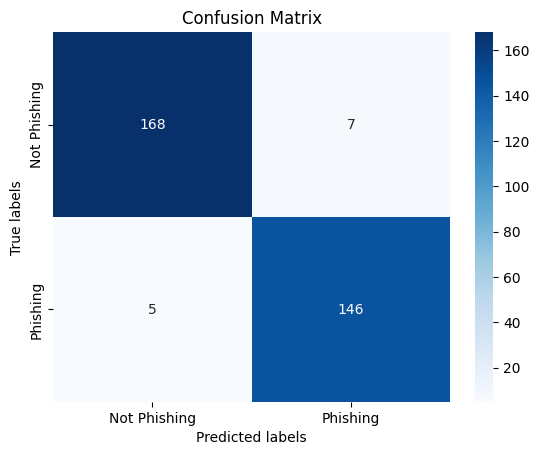

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt




# Create the heatmap
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='Blues', fmt='');

# Labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Phishing', 'Phishing'])
ax.yaxis.set_ticklabels(['Not Phishing', 'Phishing'])

plt.show()
